<a href="https://colab.research.google.com/github/Slzl/Naive-Bayes/blob/main/Bike%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv('/content/bike_dataset[1].csv')

In [36]:
df.shape

(361, 9)

In [37]:
df.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,119,99000,NaN,320.0,0,100,119,4.2,70.0
1,293,109999,NaN,236.0,0,110,293,3.6,100.0
2,268,69900,NaN,200.0,0,95,268,NaN,25.0
3,264,102999,NaN,200.0,0,120,264,3.0,100.0
4,276,85099,NaN,181.0,0,121,276,2.9,116.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    int64  
 1   price               361 non-null    int64  
 2   CC                  304 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    int64  
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    int64  
 7   acceleration_speed  170 non-null    float64
 8   top_speed           200 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 25.5 KB


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
df['model_name'] = le.fit_transform(df['model_name'])
df['type_of_bike'] = le.fit_transform(df['type_of_bike'])
df['links'] = le.fit_transform(df['links'])

In [25]:
X = df.drop('type_of_bike', axis=1)
y = df['type_of_bike']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)

In [33]:
X_test_imputed = imputer.fit_transform(X_test)

In [30]:
nb = GaussianNB()
nb.fit(X_train_imputed, y_train)

GaussianNB()

In [34]:
y_pred = nb.predict(X_test_imputed)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7671232876712328


In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
y_pred = nb.predict(X_test_imputed)

In [41]:
cm = confusion_matrix(y_test, y_pred)

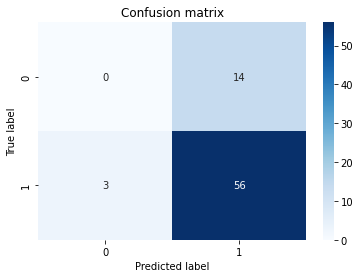

In [42]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()